## task3：实现ARIMA模型预测

## 使用zgpa_train数据集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 引入数据集
dataset = pd.read_csv('exp1_data/zgpa_train.csv', index_col=0, parse_dates=[0]) # 指定索引为Date，并处理为日期格式
dataset.head(11)

,open,high,low,close,volume
date,,,,,
2016-01-04,30.57,30.57,28.63,28.78,70997200
2016-01-05,28.41,29.54,28.23,29.23,87498504
2016-01-06,29.03,29.39,28.73,29.26,48012112
2016-01-07,28.73,29.25,27.73,28.50,23647604
2016-01-08,28.73,29.18,27.63,28.67,98239664
2016-01-11,27.73,28.06,26.73,26.76,99355696
2016-01-12,27.00,27.29,26.55,26.94,74380912
2016-01-13,27.50,27.51,26.58,26.72,62533020
2016-01-14,25.63,26.79,25.53,26.72,79722712


In [2]:
# 数据预处理，插值
dataset = dataset.resample('D').interpolate(method='linear')  # 重采样，按天取平均值

In [4]:
dataset.head(11)

,open,high,low,close,volume
date,,,,,
2016-01-04,30.570000,30.570000,28.63,28.780000,7.099720e+07
2016-01-05,28.410000,29.540000,28.23,29.230000,8.749850e+07
2016-01-06,29.030000,29.390000,28.73,29.260000,4.801211e+07
2016-01-07,28.730000,29.250000,27.73,28.500000,2.364760e+07
2016-01-08,28.730000,29.180000,27.63,28.670000,9.823966e+07
2016-01-09,28.396667,28.806667,27.33,28.033333,9.861167e+07
2016-01-10,28.063333,28.433333,27.03,27.396667,9.898369e+07
2016-01-11,27.730000,28.060000,26.73,26.760000,9.935570e+07
2016-01-12,27.000000,27.290000,26.55,26.940000,7.438091e+07


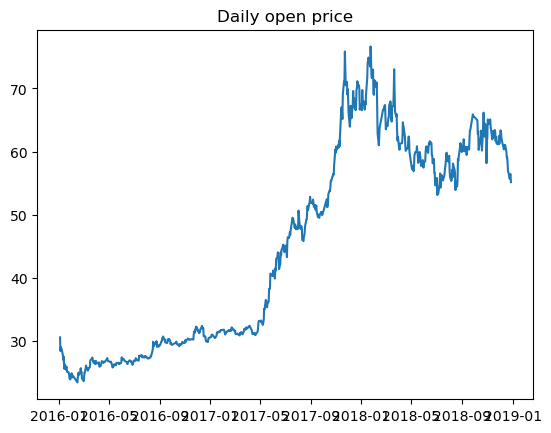

In [3]:
# 可视化
plt.plot(dataset.open)
plt.title('Daily open price')
plt.show()

### 检验平稳性

肉眼可见：不平稳

### 画出ACF、PACF图

定义绘图函数

In [5]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 定义绘图函数，画出原信号、ACF、PACF图
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
        xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # 指定轴
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # 绘制图像
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series Analysis Plots')
    plot_acf(xt, lags=nlag, ax=ax_acf)
    plot_pacf(xt, lags=nlag, ax=ax_pacf)
    plt.tight_layout()
    plt.show()
    return None

/data2/NieShiqin/anaconda3/envs/dl/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


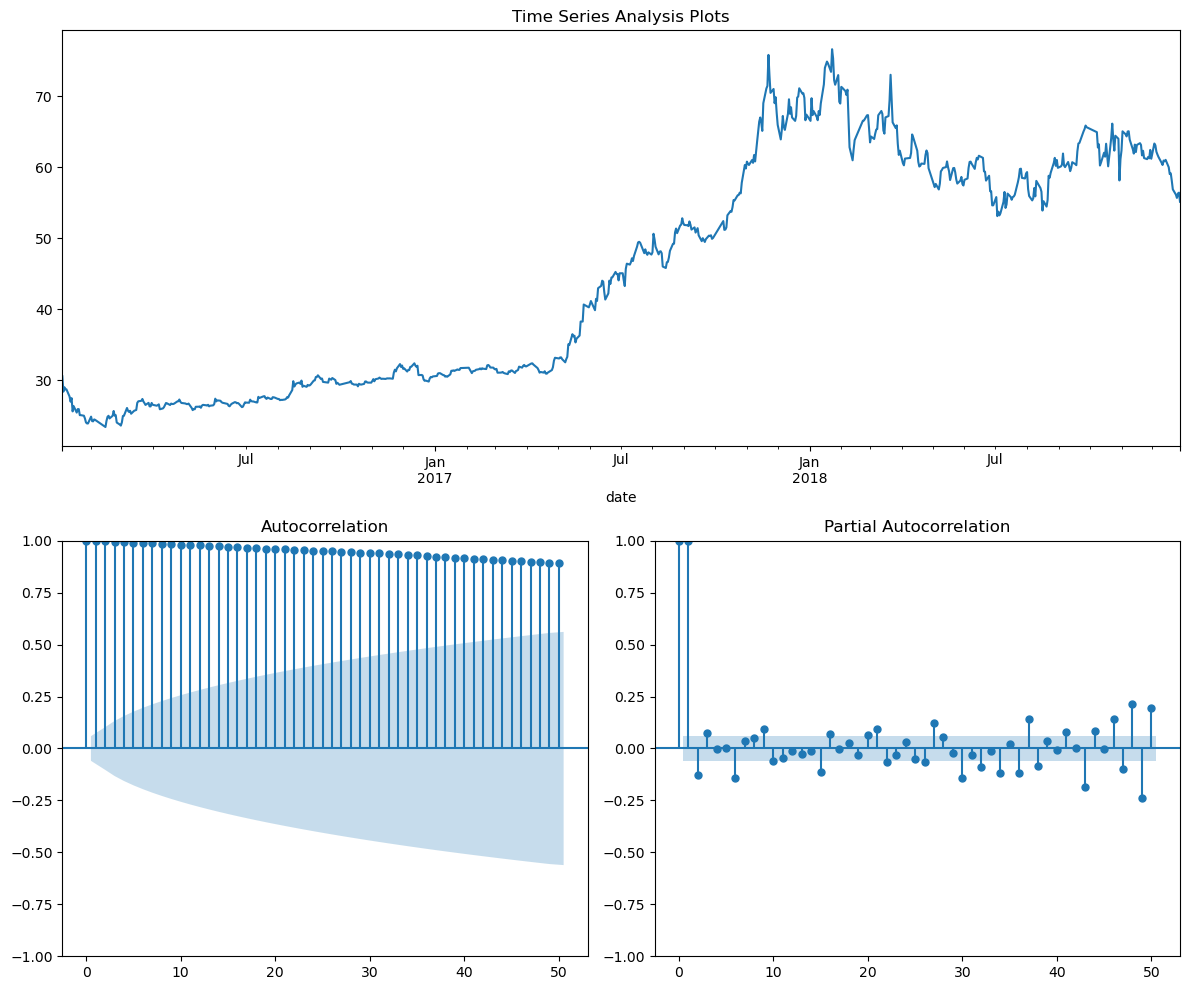

In [7]:
# 画出三图
plotds(dataset.open, nlag=50)

### 定阶选取ARIMA的p、q、d参数

In [9]:
import statsmodels.tsa.api as smtsa
import warnings

# 忽略所有警告
warnings.filterwarnings('ignore')

# d = 1
aicVal=[]
for p in range(0, 6):
    for q in range(0, 6):
        try:
            model_d1 = smtsa.ARIMA(dataset.open, order=(p, 1, q)).fit(method='innovations_mle')
            aicVal.append([p, q, model_d1.aic])
        except Exception as e:
            print(e)
            
print(aicVal)
min_aic = min(aicVal, key=lambda x: x[2])
best_p = min_aic[0]
best_q = min_aic[1]

print('Best p: ', best_p)
print('Best q: ', best_q)

[[0, 0, 2571.987574981227], [0, 1, 2573.4510095873275], [0, 2, 2574.6190568234565], [0, 3, 2576.6002585739784], [0, 4, 2578.4140911664736], [0, 5, 2572.6678866069005], [1, 0, 2573.480878957753], [1, 1, 2572.2818507648494], [1, 2, 2576.6001282794573], [1, 3, 2578.5965517286195], [1, 4, 2576.5826717345235], [1, 5, 2574.568119161574], [2, 0, 2574.617836236333], [2, 1, 2576.5717339685366], [2, 2, 2575.834240502798], [2, 3, 2563.8848766857163], [2, 4, 2566.3223660944204], [2, 5, 2565.543182147755], [3, 0, 2576.5478384793505], [3, 1, 2576.2351109373008], [3, 2, 2563.926098618671], [3, 3, 2565.783533881909], [3, 4, 2567.7538901229377], [3, 5, 2563.86449788206], [4, 0, 2578.499279003623], [4, 1, 2576.524659623231], [4, 2, 2564.322524467234], [4, 3, 2567.771252676107], [4, 4, 2564.9243908906506], [4, 5, 2568.738933042575], [5, 0, 2572.2441773023625], [5, 1, 2574.1210512242446], [5, 2, 2567.013443435058], [5, 3, 2561.3034447686077], [5, 4, 2569.3857979721524], [5, 5, 2559.717298569151]]
Best p: 

### d=1的时候进行拟合

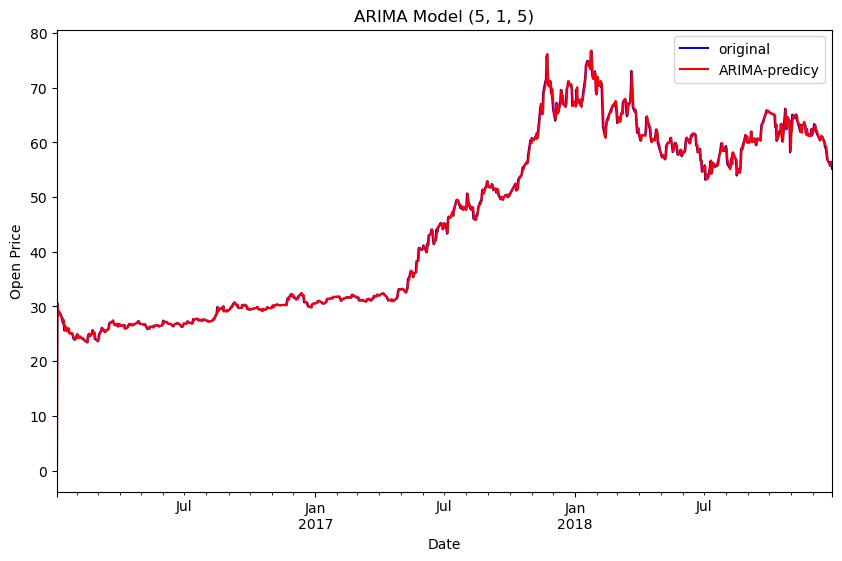

In [13]:
model = smtsa.ARIMA(dataset.open, order=(best_p, 1, best_q))
model_fit = model.fit()
dataset['ARIMA'] = model_fit.predict(typ='levels', dynamic=False)

fig, ax = plt.subplots(1, sharex=True)
fig.set_size_inches(10, 6)

dataset.open.plot(ax=ax, label='original', color='b')
dataset.ARIMA.plot(ax=ax, label='ARIMA-predicy', color='r')
ax.set_title('ARIMA Model (%s, 1, %s)' % (best_p, best_q))

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

可以发现，d = 1 的时候拟合效果非常好

### d = 2 的时候进行拟合

In [14]:
import statsmodels.tsa.api as smtsa
import warnings

# 忽略所有警告
warnings.filterwarnings('ignore')

# d = 1
aicVal=[]
for p in range(0, 6):
    for q in range(0, 6):
        try:
            model_d2 = smtsa.ARIMA(dataset.open, order=(p, 2, q)).fit(method='innovations_mle')
            aicVal.append([p, q, model_d2.aic])
        except Exception as e:
            print(e)
            
print(aicVal)
min_aic = min(aicVal, key=lambda x: x[2])
best_p = min_aic[0]
best_q = min_aic[1]

print('Best p: ', best_p)
print('Best q: ', best_q)

[[0, 0, 3295.9471434293805], [0, 1, 2578.7258053621676], [0, 2, 2580.1899399410845], [0, 3, 2581.3645865482977], [0, 4, 2583.333631667387], [0, 5, 2585.0865575604885], [1, 0, 3022.568833739233], [1, 1, 2580.2214753716166], [1, 2, 2579.0194653208496], [1, 3, 2580.991119722832], [1, 4, 2582.9710021761066], [1, 5, 2583.2297225263137], [2, 0, 2895.530680621606], [2, 1, 2581.3640852930243], [2, 2, 2580.9912827420753], [2, 3, 2569.0995660646267], [2, 4, 2576.923406032416], [2, 5, 2573.0351583627607], [3, 0, 2826.497094741245], [3, 1, 2583.267275598673], [3, 2, 2582.9729834929803], [3, 3, 2573.3029545786603], [3, 4, 2570.2765710402696], [3, 5, 2569.6435118065983], [4, 0, 2742.8269766877893], [4, 1, 2585.1899803110714], [4, 2, 2583.151621495951], [4, 3, 2578.3112879260616], [4, 4, 2569.634505229058], [4, 5, 2560.6556015475016], [5, 0, 2725.0453251809204], [5, 1, 2578.9818533209414], [5, 2, 2580.860126172628], [5, 3, 2575.078853420841], [5, 4, 2571.6638614017993], [5, 5, 2567.73817293048]]
Best

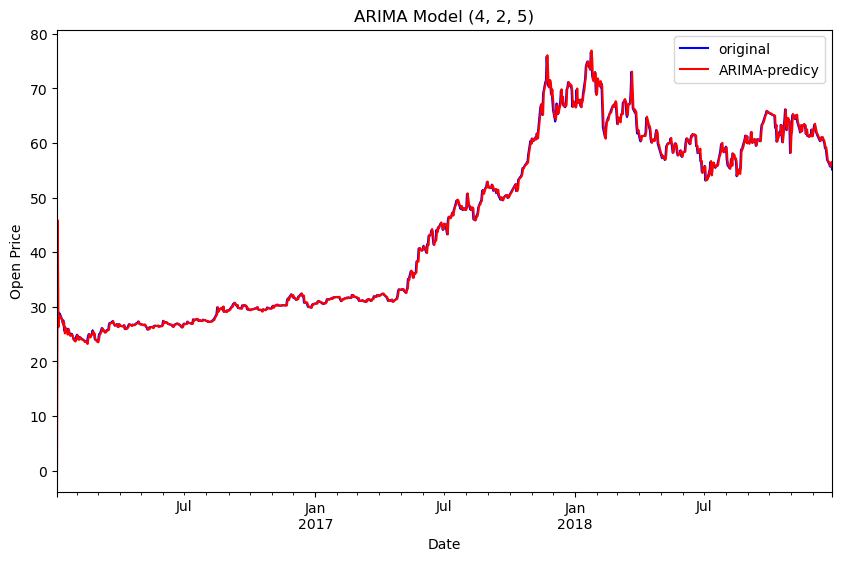

In [15]:
model = smtsa.ARIMA(dataset.open, order=(best_p, 2, best_q))
model_fit = model.fit()
dataset['ARIMA'] = model_fit.predict(typ='levels', dynamic=False)

fig, ax = plt.subplots(1, sharex=True)
fig.set_size_inches(10, 6)

dataset.open.plot(ax=ax, label='original', color='b')
dataset.ARIMA.plot(ax=ax, label='ARIMA-predicy', color='r')
ax.set_title('ARIMA Model (%s, 2, %s)' % (best_p, best_q))

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

可以发现，d = 2 的时候拟合效果也非常好

### 使用其他模型进行比较

若使用AR模型

In [16]:
from statsmodels.tsa.ar_model import AutoReg as AR

aicVal = []
for ari in range(0, 10):
    try:
        model = AR(dataset.open, lags=ari).fit()
        aicVal.append([ari, model.aic])
    except Exception as e:
        print(e)
        
print(aicVal)
min_aic = min(aicVal, key=lambda x: x[1])
best_ari = min_aic[0]

print('Best AR order (ari):', best_ari)

[[0, 9147.54185294727], [1, 2574.2225178101658], [2, 2566.4982766644143], [3, 2565.6444945113294], [4, 2565.9234959894643], [5, 2566.515166000905], [6, 2558.6826100029652], [7, 2559.016379386989], [8, 2555.5889716545485], [9, 2542.2781915167047]]
Best AR order (ari): 9


In [19]:
model = AR(dataset.open.tolist(), lags=99)
model_fit = model.fit()

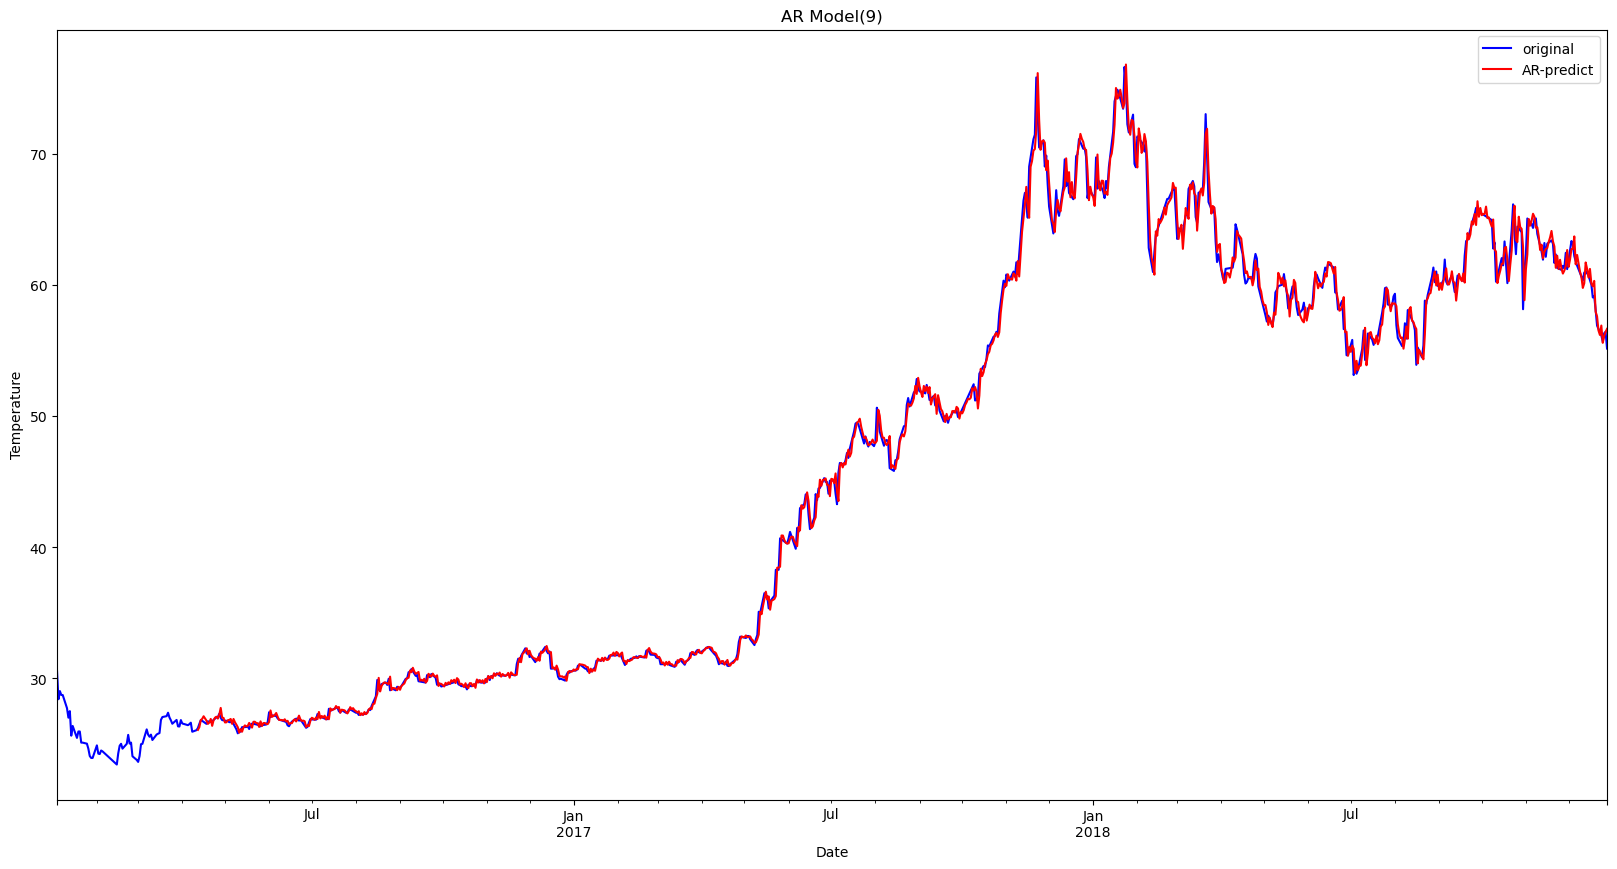

In [21]:
dataset['AR'] = model_fit.predict()
fig,ax = plt.subplots(1, sharex=True)
fig.set_size_inches(20, 10)

# 画出真实数据
dataset.open.plot(ax=ax, color='b', label='original')
# 画出预测数据
dataset.AR.plot(ax=ax, color='r', label='AR-predict')
ax.set_title('AR Model(%s)' % best_ari)

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

可以看出，AR模型的拟合性能不如ARIMA